## MLFP PROJECT

- The class and assignment- MLFP 90803, Sprint 3
- Team Name- Team 13
- Sara Clemente, Gracie Siu, Sharon John
- Explanations where needed for your tasks are provided in each cell.}


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
import plotly.express as px

In [2]:
#load in gender data (x variables)
gender = pd.read_csv('Gender_StatsData.csv')
gender.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,A woman can apply for a passport in the same w...,SG.APL.PSPT.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,A woman can choose where to live in the same w...,SG.LOC.LIVE.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,A woman can obtain a judgment of divorce in th...,SG.OBT.DVRC.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#drop country code, contains repetitive data
gender = gender.drop(columns=['Country Code', 'Indicator Code'])

### Transform and Restructure Data

In [4]:
#transform the data to a wide format
gender_melted = pd.melt(gender, id_vars=['Country Name', 'Indicator Name'],
                        var_name = 'Year',
                        value_name='Value')

#view the melted df
gender_melted.head()

,Country Name,Indicator Name,Year,Value
0,Africa Eastern and Southern,A woman can apply for a passport in the same w...,1960,NaN
1,Africa Eastern and Southern,A woman can be head of household in the same w...,1960,NaN
2,Africa Eastern and Southern,A woman can choose where to live in the same w...,1960,NaN
3,Africa Eastern and Southern,A woman can get a job in the same way as a man...,1960,NaN
4,Africa Eastern and Southern,A woman can obtain a judgment of divorce in th...,1960,NaN


In [5]:
#use pivot to transform the data again and make the years row data
gender_melted_pivot = pd.pivot_table(gender_melted, index=['Country Name', 'Year'], columns='Indicator Name', values='Value', aggfunc='first').reset_index()

#view the restructured df
gender_melted_pivot.head()

Indicator Name,Country Name,Year,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),...,Worried about not having enough money for old age: somewhat worried (% age 15+),"Worried about not having enough money for old age: somewhat worried, female (% age 15+)","Worried about not having enough money for old age: somewhat worried, male (% age 15+)",Worried about not having enough money for old age: very worried (% age 15+),"Worried about not having enough money for old age: very worried, female (% age 15+)","Worried about not having enough money for old age: very worried, male (% age 15+)","Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)"
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Values

In [6]:
#checking missing data in columns
missing_columns = gender_melted_pivot.isnull().sum(axis=0)/len(gender_melted_pivot)

#find indices of columns with greater than 50% of their data missing
column_indexes = missing_columns[missing_columns <= 0.50].index

#filter df based on the selected columns
gender_melted_pivot_filtered = gender_melted_pivot[column_indexes]

#check missing values
(gender_melted_pivot_filtered.isnull().sum(axis=0)/len(gender_melted_pivot_filtered)).sort_values(ascending = False)

Indicator Name
School enrollment, secondary (gross), gender parity index (GPI)    0.496077
School enrollment, preprimary (% gross)                            0.492962
Secondary education, vocational pupils                             0.492842
School enrollment, tertiary (% gross)                              0.482180
School enrollment, secondary, male (% gross)                       0.475891
                                                                     ...   
Population, female (% of total)                                    0.000000
Population ages 65 and above (% of total)                          0.000000
Population ages 15-64 (% of total)                                 0.000000
Population ages 0-14 (% of total)                                  0.000000
Country Name                                                       0.000000
Length: 166, dtype: float64

In [7]:
# check missing data in rows
missing_rows = gender_melted_pivot_filtered.isnull().sum(axis=1) / len(gender_melted_pivot_filtered.columns)

#find indices of rows with greater than 50% of their data missing
row_indexes = missing_rows[missing_rows <= 0.50].index

#filter df based on the selected columns
gender_melted_pivot_filtered = gender_melted_pivot_filtered.loc[row_indexes]

#filter the df to only contain years from 2000 on
gender_melted_pivot_filtered_2000 = gender_melted_pivot_filtered[gender_melted_pivot_filtered['Year']>= '2000']

#view the df
gender_melted_pivot_filtered_2000.head()

Indicator Name,Country Name,Year,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),...,"Vocational and Technical enrolment (% of total secondary enrolment), total",Women Business and the Law Index Score (scale 1-100),"Women, Business and the Law: Assets Indicator Score (scale 1-100)","Women, Business and the Law: Entrepreneurship Indicator Score (scale 1-100)","Women, Business and the Law: Marriage Indicator Score (scale 1-100)","Women, Business and the Law: Mobility Indicator Score (scale 1-100)","Women, Business and the Law: Parenthood Indicator Score (scale 1-100)","Women, Business and the Law: Pay Indicator Score (scale 1-100)","Women, Business and the Law: Pension Indicator Score (scale 1-100)","Women, Business and the Law: Workplace Indicator Score (scale 1-100)"
40,Afghanistan,2000,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,NaN,26.25,40.0,75.0,20.0,25.0,0.0,0.0,25.0,25.0
41,Afghanistan,2001,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.00000,26.25,40.0,75.0,20.0,25.0,0.0,0.0,25.0,25.0
42,Afghanistan,2002,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,NaN,26.25,40.0,75.0,20.0,25.0,0.0,0.0,25.0,25.0
43,Afghanistan,2003,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.46523,26.25,40.0,75.0,20.0,25.0,0.0,0.0,25.0,25.0
44,Afghanistan,2004,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.46525,26.25,40.0,75.0,20.0,25.0,0.0,0.0,25.0,25.0


### Data Types

In [8]:
#check data types
gender_melted_pivot_filtered_2000.dtypes

#change data type of year
gender_melted_pivot_filtered_2000['Year'] = gender_melted_pivot_filtered_2000['Year'].astype(int)

#check data types
gender_melted_pivot_filtered_2000.dtypes

/var/folders/4n/ml7lc7x53fv270yhl65sh7fw0000gn/T/ipykernel_2406/2430457700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_melted_pivot_filtered_2000['Year'] = gender_melted_pivot_filtered_2000['Year'].astype(int)


Indicator Name
Country Name                                                                object
Year                                                                         int64
A woman can apply for a passport in the same way as a man (1=yes; 0=no)    float64
A woman can be head of household in the same way as a man (1=yes; 0=no)    float64
A woman can choose where to live in the same way as a man (1=yes; 0=no)    float64
                                                                            ...   
Women, Business and the Law: Mobility Indicator Score (scale 1-100)        float64
Women, Business and the Law: Parenthood Indicator Score (scale 1-100)      float64
Women, Business and the Law: Pay Indicator Score (scale 1-100)             float64
Women, Business and the Law: Pension Indicator Score (scale 1-100)         float64
Women, Business and the Law: Workplace Indicator Score (scale 1-100)       float64
Length: 166, dtype: object

## STEM Graduate Data

In [9]:
#load in share of stem graduate data (y variable)
stem_data = pd.read_csv('Share of graduates by field, female (%).csv')
stem_data.head()

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,"Female share of graduates in Agriculture, Fore...",SE.TER.GRAD.FE.AG.ZS,Afghanistan,AFG,2014,3.41704,"female, Agriculture, Forestry, Fisheries and V..."
1,"Female share of graduates in Agriculture, Fore...",SE.TER.GRAD.FE.AG.ZS,Albania,ALB,2018,45.96364,"female, Agriculture, Forestry, Fisheries and V..."
2,"Female share of graduates in Agriculture, Fore...",SE.TER.GRAD.FE.AG.ZS,Albania,ALB,2017,42.34875,"female, Agriculture, Forestry, Fisheries and V..."
3,"Female share of graduates in Agriculture, Fore...",SE.TER.GRAD.FE.AG.ZS,Albania,ALB,2016,40.32012,"female, Agriculture, Forestry, Fisheries and V..."
4,"Female share of graduates in Agriculture, Fore...",SE.TER.GRAD.FE.AG.ZS,Albania,ALB,2015,44.64894,"female, Agriculture, Forestry, Fisheries and V..."


In [10]:
#keep only the STEM graduate shared
stem_data_shares = stem_data[stem_data['Indicator Name']=='Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)']

#drop columns with irrelevant information
stem_dropped = stem_data_shares.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code', 'Disaggregation']).sort_values(by=['Country Name', 'Year']).reset_index()

#drop index column
stem = stem_dropped.drop(columns=['index']).rename(columns={'Value': 'Share of STEM Graduates'})

#view the df
stem.head()

,Country Name,Year,Share of STEM Graduates
0,Albania,2000,32.43243
1,Albania,2003,44.20063
2,Albania,2011,48.06421
3,Albania,2015,52.78050
4,Albania,2016,48.29606


In [11]:
#merge the gender data with the STEM grad data
merged_data = pd.merge(gender_melted_pivot_filtered_2000, stem, on=['Country Name', 'Year'], how='inner')
merged_data.head(30)

,Country Name,Year,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),...,Women Business and the Law Index Score (scale 1-100),"Women, Business and the Law: Assets Indicator Score (scale 1-100)","Women, Business and the Law: Entrepreneurship Indicator Score (scale 1-100)","Women, Business and the Law: Marriage Indicator Score (scale 1-100)","Women, Business and the Law: Mobility Indicator Score (scale 1-100)","Women, Business and the Law: Parenthood Indicator Score (scale 1-100)","Women, Business and the Law: Pay Indicator Score (scale 1-100)","Women, Business and the Law: Pension Indicator Score (scale 1-100)","Women, Business and the Law: Workplace Indicator Score (scale 1-100)",Share of STEM Graduates
0,Albania,2000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,77.500,100.0,75.0,80.0,100.0,40.0,75.0,50.0,100.0,32.43243
1,Albania,2003,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,77.500,100.0,75.0,80.0,100.0,40.0,75.0,50.0,100.0,44.20063
2,Albania,2011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,85.625,100.0,100.0,100.0,100.0,60.0,75.0,50.0,100.0,48.06421
3,Albania,2015,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,85.625,100.0,100.0,100.0,100.0,60.0,75.0,50.0,100.0,52.78050
4,Albania,2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,91.250,100.0,100.0,100.0,100.0,80.0,100.0,50.0,100.0,48.29606
5,Albania,2017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,91.250,100.0,100.0,100.0,100.0,80.0,100.0,50.0,100.0,48.60221
6,Albania,2018,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,91.250,100.0,100.0,100.0,100.0,80.0,100.0,50.0,100.0,46.65349
7,Algeria,2007,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,55.000,40.0,75.0,40.0,75.0,60.0,50.0,25.0,75.0,46.41335
8,Algeria,2009,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,55.000,40.0,75.0,40.0,75.0,60.0,50.0,25.0,75.0,47.43679
9,Algeria,2010,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,55.000,40.0,75.0,40.0,75.0,60.0,50.0,25.0,75.0,49.13330


## Data Exploration

- Drop columns that are unlikely to predict total # of Female graduates in STEM
- Drop columns thare are repetitive within dataset

In [12]:
merged_data = merged_data.drop(columns=['Women Business and the Law Index Score (scale 1-100)',
                                        'Women, Business and the Law: Assets Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Entrepreneurship Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Marriage Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Mobility Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Parenthood Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Pay Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Pension Indicator Score (scale 1-100)',
                                        'Women, Business and the Law: Workplace Indicator Score (scale 1-100)',
                                        'Death rate, crude (per 1,000 people)',
                                        'Birth rate, crude (per 1,000 people)',
                                        'GNI per capita, Atlas method (current US$)',
                                        'GNI, Atlas method (current US$)',
                                        'Immunization, DPT (% of children ages 12-23 months)',
                                        'Immunization, measles (% of children ages 12-23 months)',
                                        'Length of paid shared parental leave (calendar days)',
                                        'Mortality rate, adult, female (per 1,000 female adults)',
                                        'Mortality rate, adult, male (per 1,000 male adults)',
                                        'Mortality rate, infant (per 1,000 live births)',
                                        'Mortality rate, infant, female (per 1,000 live births)',
                                        'Mortality rate, infant, male (per 1,000 live births)',
                                        'Mortality rate, under-5 (per 1,000 live births)',
                                        'Mortality rate, under-5, female (per 1,000 live births)',
                                        'Mortality rate, under-5, male (per 1,000 live births)',
                                        'Number of infant deaths',
                                        'Number of infant deaths, female',
                                        'Number of infant deaths, male',
                                        'Number of under-five deaths, female',
                                        'Number of under-five deaths, male',
                                        'Prevalence of overweight (% of adults)',
                                        'Prevalence of overweight, female (% of female adults)',
                                        'Prevalence of overweight, male (% of male adults)',
                                        'School enrollment, secondary (gross), gender parity index (GPI)',
                                        'School enrollment, preprimary (% gross)',
                                        'School enrollment, secondary (% gross)',
                                        'School enrollment, secondary, male (% gross)',
                                        'School enrollment, primary, male (% gross)',
                                        'School enrollment, primary (% gross)',
                                        'School enrollment, primary (gross), gender parity index (GPI)', 
                                        'GDP growth (annual %)', 'GDP per capita (constant 2010 US$)'
                                        ])

### How many nulls?

In [13]:
merged_data.isnull().sum().sort_values(ascending=False).head(50)

Secondary education, vocational pupils                                                                182
Vocational and Technical enrolment (% of total secondary enrolment), total                            174
School enrollment, secondary, female (% gross)                                                        150
School enrollment, tertiary (% gross)                                                                 114
Inflation, consumer prices (annual %)                                                                  87
School enrollment, primary, female (% gross)                                                           80
The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no)     76
The law grants spouses equal administrative authority over assets during marriage (1=yes; 0=no)        76
The government administers 100% of maternity leave benefits (1=yes; 0=no)                              76
The age at which men and women can retire with

### Drop countries that have a high amount of missing data

In [14]:
# Drop countries with limited data

countries = ['Andorra', 'Aruba', 'Bermuda', 'British Virgin Islands', 
             'Cayman Islands', 'Cuba', 'Gibraltar', 'Korea, Dem. People\'s Rep.', 
             'Liechtenstein', 'Macao SAR, China', 'Monaco', 'Sint Maarten (Dutch part)',
               'Nauru', 'Tuvalu','San Marino','Sao Tome and Principe','Eritrea'
               ]

indexes = merged_data[merged_data['Country Name'].isin(countries)].index

merged_data = merged_data.drop(index=indexes)


### Check Missing Data Percentages by Columns

In [15]:
(merged_data.isnull().sum() * 100 / merged_data.shape[0]).sort_values(ascending=False).head(50)

Secondary education, vocational pupils                                                                14.005602
Vocational and Technical enrolment (% of total secondary enrolment), total                            13.258637
School enrollment, secondary, female (% gross)                                                        12.698413
School enrollment, tertiary (% gross)                                                                  8.403361
School enrollment, primary, female (% gross)                                                           6.442577
Primary education, pupils (% female)                                                                   3.548086
Inflation, consumer prices (annual %)                                                                  2.894491
Population ages 65 and above, male                                                                     0.000000
Population ages 65 and above, female                                                                   0

### Replace Remaining Null Values with Column Medians

In [16]:
merged_data['Secondary education, vocational pupils'] = merged_data['Secondary education, vocational pupils'].replace(np.nan,(merged_data['Secondary education, vocational pupils']).median())

merged_data['Vocational and Technical enrolment (% of total secondary enrolment), total'] = merged_data['Vocational and Technical enrolment (% of total secondary enrolment), total'].replace(np.nan,(merged_data['Vocational and Technical enrolment (% of total secondary enrolment), total']).median())

merged_data['School enrollment, secondary, female (% gross)'] = merged_data['School enrollment, secondary, female (% gross)'].replace(np.nan,(merged_data['School enrollment, secondary, female (% gross)']).median())

merged_data['School enrollment, tertiary (% gross)'] = merged_data['School enrollment, tertiary (% gross)'].replace(np.nan,(merged_data['School enrollment, tertiary (% gross)']).median())

merged_data['School enrollment, primary, female (% gross)'] = merged_data['School enrollment, primary, female (% gross)'].replace(np.nan,(merged_data['School enrollment, primary, female (% gross)']).median())

merged_data['Primary education, pupils (% female)'] = merged_data['Primary education, pupils (% female)'].replace(np.nan,(merged_data['Primary education, pupils (% female)']).median())

merged_data['Inflation, consumer prices (annual %)'] = merged_data['Inflation, consumer prices (annual %)'].replace(np.nan,(merged_data['Inflation, consumer prices (annual %)']).median())


### Check for covariats 

In [17]:
correlation_matrix = merged_data.corr(numeric_only=True)

fig = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    aspect="auto")

fig.update_layout(
    title="Heatmap of Features",
    width=1200,
    height=1200
)

fig.show()

### To simplify analysis, check for covariats with correlation  <-0.7 or >0.70

In [18]:
correlation_matrix = merged_data.corr(numeric_only=True)

high_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

plot_data = high_correlations

# Plotting heatmap

fig = px.imshow(
    high_correlations,
    labels=dict(color="Correlation"),
    x=high_correlations.columns,
    y=high_correlations.columns,
    aspect="auto")

fig.update_layout(
    title="Heatmap of Features",
    width=1200,
    height=1200
)

fig.show()

### Drop one of two columns with a high correlation

In [19]:
merged_data = merged_data.drop(columns=['Age population, age 0, female, interpolated',
                                        'Age population, age 0, male, interpolated',
                                        'Age population, age 01, female, interpolated',
                                        'Age population, age 01, male, interpolated',
                                        'Age population, age 02, female, interpolated',
                                        'Age population, age 02, male, interpolated',
                                        'Age population, age 03, female, interpolated',
                                        'Age population, age 03, male, interpolated',
                                        'Age population, age 04, female, interpolated',
                                        'Age population, age 04, male, interpolated',
                                        'Age population, age 05, female, interpolated',
                                        'Age population, age 05, male, interpolated',
                                        'Population ages 0-14 (% of total)',
                                        'Population ages 0-14, male',
                                        'Population ages 0-14, female',
                                        'Population ages 0-14, total',
                                        'Population ages 00-04, male',
                                        'Population ages 00-04, female',
                                        'Population ages 05-09, male',
                                        'Population ages 05-09, female',
                                        'Population ages 10-14, male',
                                        'Population ages 10-14, female',
                                        'Population ages 15-19, male',
                                        'Population ages 15-19, female',
                                        'Population ages 15-64 (% of total)',
                                        'Population ages 15-64, male',
                                        'Population ages 15-64, female',
                                        'Population ages 15-64, total',
                                        'Population ages 20-24, male',
                                        'Population ages 20-24, female',
                                        'Population ages 25-29, male',
                                        'Population ages 25-29, female',
                                        'Population ages 30-34, male',
                                        'Population ages 30-34, female',
                                        'Population ages 35-39, male',
                                        'Population ages 35-39, female',
                                        'Population ages 40-44, male',
                                        'Population ages 40-44, female',
                                        'Population ages 45-49, male',
                                        'Population ages 45-49, female',
                                        'Population ages 50-54, male',
                                        'Population ages 50-54, female',
                                        'Population ages 55-59, male',
                                        'Population ages 55-59, female',
                                        'Population ages 60-64, male',
                                        'Population ages 60-64, female',
                                        'Population ages 65 and above (% of total)',
                                        'Population ages 65 and above, male',
                                        'Population ages 65 and above, total',
                                        'Population ages 65-69, male',
                                        'Population ages 65-69, female',
                                        'Population ages 70-74, male',
                                        'Population ages 70-74, female',
                                        'Population ages 75-79, male',
                                        'Population ages 75-79, female',
                                        'Population ages 80 and above, male',
                                        'Population, male',
                                        'Population, female',
                                        'Population, total',
                                        'Life expectancy at age 60, male (years)',
                                        'Life expectancy at birth, male (years)',
                                        'Life expectancy at birth, total (years)',
                                        'A woman can apply for a passport in the same way as a man (1=yes; 0=no)',
                                        'There is legislation on sexual harassment in employment (1=yes; 0=no)',
                                        'Urban population (% of total population)',
                                        'Survival to age 65, female, (% of cohort)',
                                        'Survival to age 65, male, (% of cohort)',
                                        'Men and women have equal ownership rights to immovable property (1=yes; 0=no)',
                                        'A woman can travel outside the country in the same way as a man (1=yes; 0=no)',
                                        'Male and female surviving spouses have equal rights to inherit assets (1=yes; 0=no)',
                                        'Life expectancy at birth, female (years)',
                                        'Population ages 80 and above, female'
                                        ]
                                        )

### Visualize new correlation matrix with cleaned data

In [20]:
correlation_matrix = merged_data.corr(numeric_only=True)

fig = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    aspect="auto")

fig.update_layout(
    title="Heatmap of Features",
    width=1300,
    height=1300
)

fig.show()

In [21]:
merged_data.to_csv('export.csv')

### Visualize a few features with boxplots

Text(0, 0.5, 'Share of female STEM graduates')

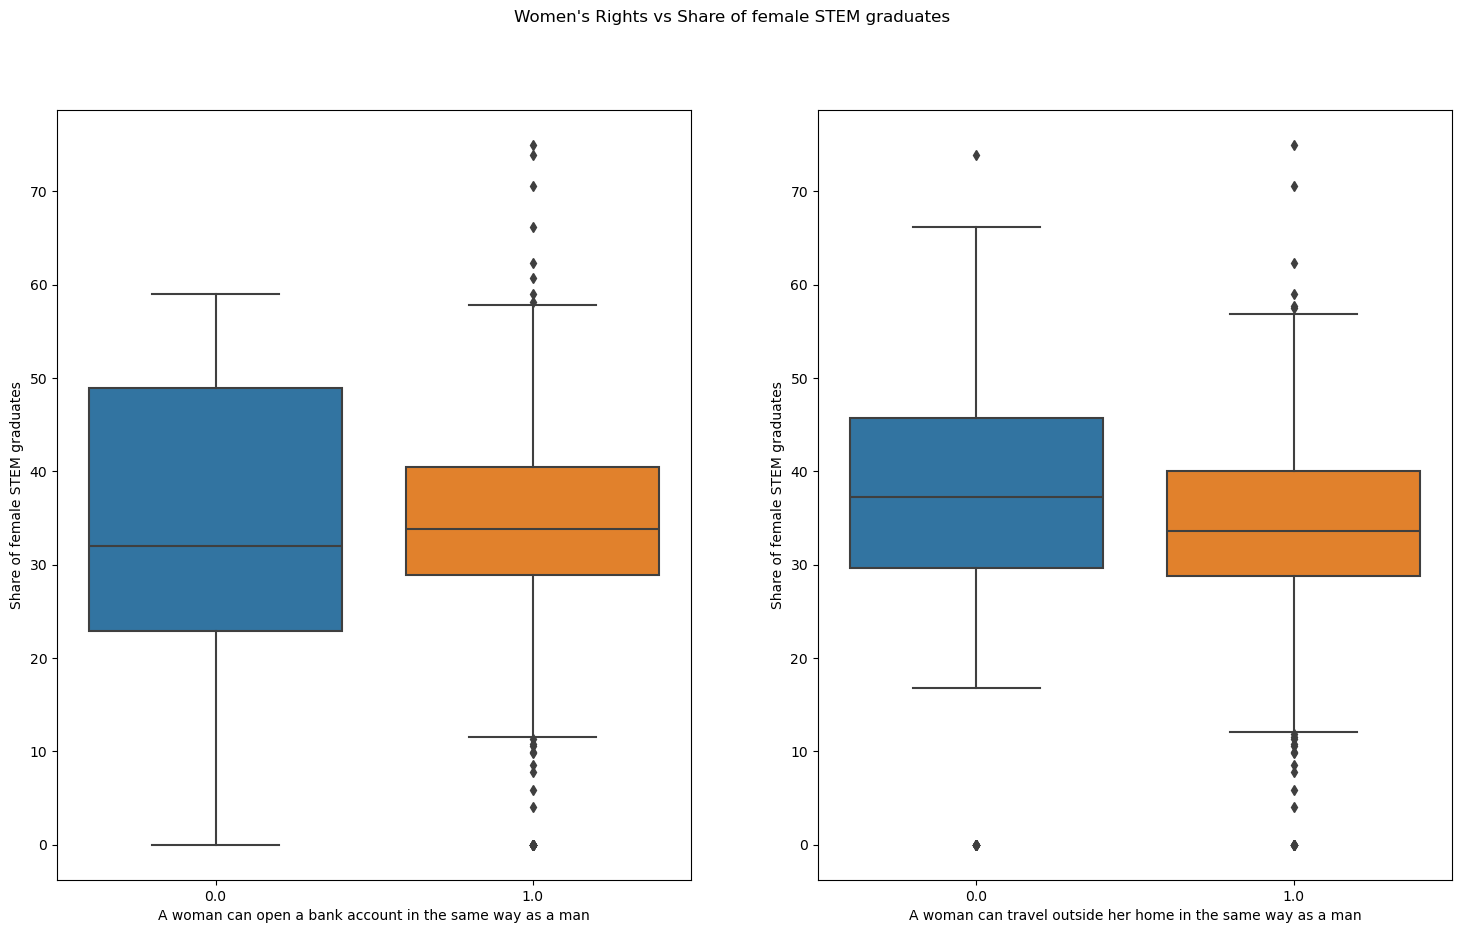

In [22]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize = (18, 10))
fig.suptitle("Women's Rights vs Share of female STEM graduates")

# Plot 1: A woman can open a bank account in the same way as a man vs Female Share of STEM graduates 
sns.boxplot(data=merged_data, x="A woman can open a bank account in the same way as a man (1=yes; 0=no)", y="Share of STEM Graduates", ax=axes[0])
axes[0].set_xlabel('A woman can open a bank account in the same way as a man')
axes[0].set_ylabel('Share of female STEM graduates')
# Plot 2: A woman can travel outside her home in the same way as a man vs Share of female STEM graduates
sns.boxplot(data=merged_data, x="A woman can travel outside her home in the same way as a man (1=yes; 0=no)", y="Share of STEM Graduates", ax=axes[1])
axes[1].set_xlabel('A woman can travel outside her home in the same way as a man')
axes[1].set_ylabel('Share of female STEM graduates')

### Visualize a few features with line plot


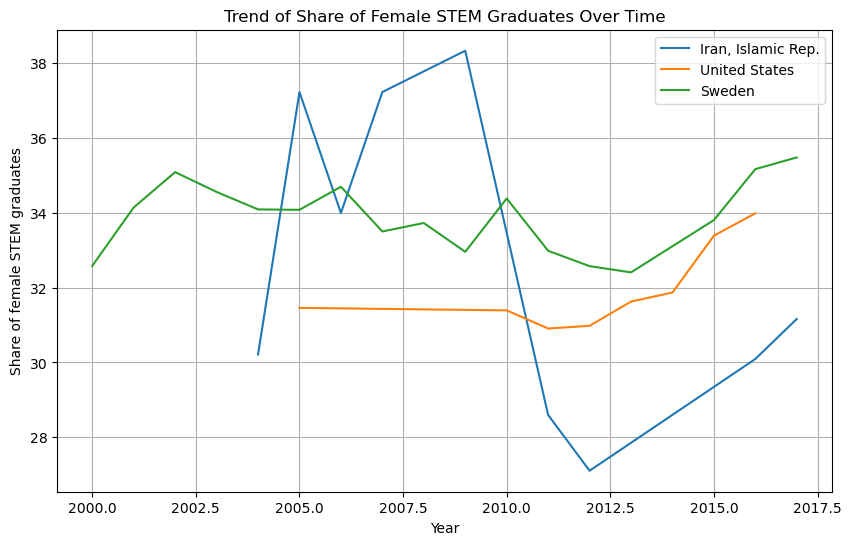

In [23]:
# Filter the data for specific countries or regions of interest
countries_of_interest = ['Iran, Islamic Rep.', 'United States', 'Sweden']
data_filtered = merged_data[merged_data['Country Name'].isin(countries_of_interest)]

# Group the data by year and calculate the mean share of female STEM graduates for each year
mean_share_stem_by_year = data_filtered.groupby('Year')['Share of STEM Graduates'].mean().reset_index()

# Plotting the trend of share of female STEM graduates over time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = data_filtered[data_filtered['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Share of STEM Graduates'], label=country)

plt.xlabel('Year')
plt.ylabel('Share of female STEM graduates')
plt.title('Trend of Share of Female STEM Graduates Over Time')
plt.legend()
plt.grid(True)
plt.show()


### References:

- https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- Lab 2 from EDA
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html